# <font color=red> Chapter 6 :  Logistic Regression and Classification </font>
### a type of regression that predicts a probability of an outcome given one or more independent variables. This in turn can be used for classification, which is predicting categories.

## <font color=red> Understanding Logistic Regression</font>

### Imagine there was a small industrial accident and you are trying to understand the impact of chemical exposure. You have 11 patients who were exposed for differing numbers of hours to this chemical.</br>
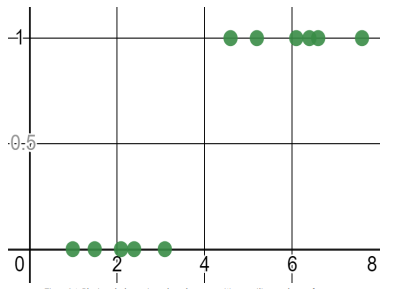

### Doing a cursory analysis on this sample, we can say that there is nearly 0% probability a patient exposed for fewer than four hours will show symptoms, but there is 100% probability for greater than four hours. Between these two groups, there is an immediate jump to showing symptoms at approximately four hours.</br><font color=blue>Of course, nothing is ever this clear-cut in the real world.</font></br>
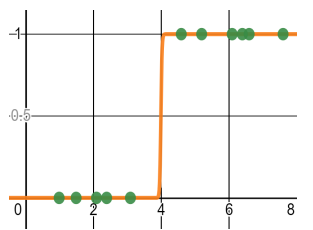

### Let’s say you gathered more data, where the middle of the range has a mix of patients showing symptoms versus not showing symptoms. </br>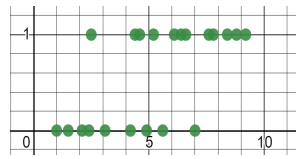

### Let’s visualize this with a <font color=green>logistic function</font>, or an Sshaped curve where the output variable is squeezed between 0 and 1. Because of this overlap of points in the middle, there is no distinct cutoff when patients how symptoms but rather a gradual transition from 0% probability to 100% probability (0 and 1). This example demonstrates how a logistic regression results in a curve indicating a probability of belonging to the true category (a patient showed symptoms) across an independent variable (hours of exposure).</br> 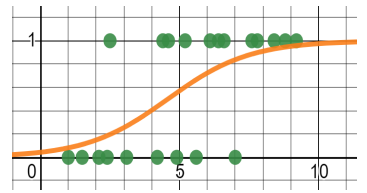

### We can repurpose a logistic regression to not just predict a probability for given input variables but also add a threshold to predict whether it belongs to that category.</br> For example, if I get a new patient and find they have been exposed for six hours, I predict a 71.1% chance they will show symptoms as traced. If my<font color=green> threshold</font> is at least 50% probability to show symptoms, I will simply classify that the patient will show symptoms.</br>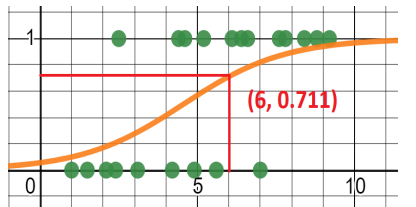

## <font color=red>Performing a Logistic Regression </font>
### <font color=green>Logistic Function</font>
### The logistic function is an <font color=green>S-shaped curve</font> (also known as a <font color=green>sigmoid curve</font>) that, for a given set of input variables, produces an output variable between 0 and 1. Because the output variable is between 0 and 1 it can be used to represent a probability.</br>the logistic function for input variable x is : </br>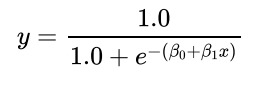</br>The x variable is the independent/input variable. β0 and β1 are the coefficients we need to solve for. β0 and β1 are packaged inside an exponent resembling a linear function, which you may recall looks identical to y = mx + b or y = β0 + β1x

In [1]:
import math
def logistic_function(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

### Note like linear regression we can also extend logistic regression to more than one input variable (x1, x2, . . . xn), as shown in this formula. We just add more βx coefficients:</br>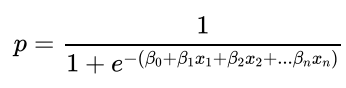

### <font color=green>Fitting the Logistic Curve</font>
### How do you fit the logistic curve to a given training dataset? First, the data can have any mix of decimal, integer, and binary variables, but the output variable must be binary (0 or 1). When we actually do prediction, the output variable will be between 0 and 1, resembling a probability.
### The data provides our input and output variable values, but we need to solve for the β0 and β1 coefficients to fit our logistic function. we used least squares in linear regression but it does not apply here. Instead we use <font color=green>maximum likelihood estimation (MLE)</font>, which, maximizes the likelihood a given logistic curve would output the observed data. There are several ways to fit a logistic regressionourselves, but all methods typically turn to maximum likelihood estimation (MLE). MLE maximizes the likelihood a given logistic curve would output the observed data.

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.DataFrame({'X':[1,1.5,2,2.2,2.3,3,4,4.2,4.5,4.9,5.1,5.4,6,6.3,6.7,7,7.5,7.9,8.3,8.5,9],
                   'Y':[0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,0,1,1,1,1,1]})
X = df['X'].values.reshape(-1,1); Y = df['Y'].values.reshape(-1,1)

#penalty argument, which chooses a regularization technique like l1 or l2
model = LogisticRegression(penalty='none')
model.fit(X, Y)

#the coefficient(b1) and intercept(b0), which come out as multidimensional matrices but with one element.
#Flattening means collapsing a matrix of numbers into lesser dimensions.
print(model.intercept_.flatten()) #b0 = -3.02126737
print(model.coef_.flatten())      #b1 = 0.6754105

[-3.02126737]
[0.6754105]


C:\Users\Ehsan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Ehsan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Essentially, the idea is to find the β0 and β1 coefficients that bring our logistic curve to those points as closely as possible, indicating it is most likely to have produced those points.

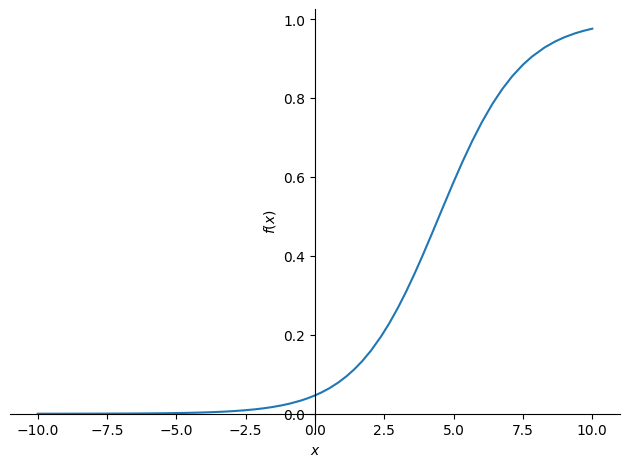

In [3]:
from sympy import *
b0, b1, x = symbols('b0 b1 x')
p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
p = p.subs(b0,-3.02126737)
p = p.subs(b1, 0.6754105)
plot(p)

### when we studied probability, we combine probabilities (or likelihoods) of multiple events by multiplying them together. In this application, we are calculating the likelihood we would see all these points for a given logistic regression curve. </br>
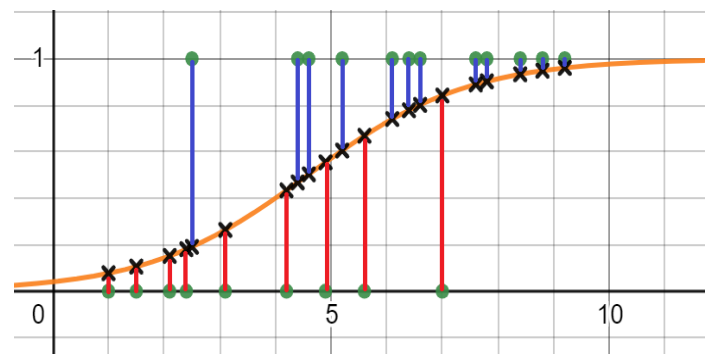</br>
### We fetch each likelihood off the logistic regression curve above or below each point. If the point is below the logistic regression curve, we need to subtract the resulting probability from 1.0 because we want to maximize the false cases too.</br>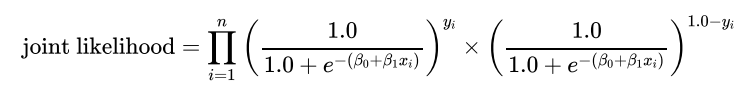</br>when you set any number to the power of 0 it will always be 1.

In [4]:
joint_likelihood = 1.0
b0 = -3.02126737; b1 = 0.6754105

for i in range(len(X)):
    if Y[i][0] == 1:
        joint_likelihood *= logistic_function(X[i][0],b0,b1)
    elif Y[i][0] == 0:
        joint_likelihood *= (1.0 - logistic_function(X[i][0],b0,b1))

print(joint_likelihood)

4.3916644282376904e-05


## <font color=red>Multivariable Logistic Regression</font>

### we will create β coefficients for each of the variables x1, x2, x3, and ... . The output variable y is binary, and that is going to drive the logistic regression outcome we are predicting. Because we are dealing with multiple dimensions, it is going to be curvy hyperplane that is our logistic curve.</br>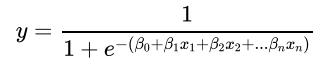

In [5]:
#X = df[['a','b','c']]; Y = df['d']
#fit = LogisticRegression(penalty='none').fit(X, Y)
#print(fit.intercept_.flatten()) #b0
#print(fit.coef_.flatten())      #b1 

## <font color=red>Understanding the Log-Odds</font>

### it has always been of interest to mathematicians to take a linear function and scale its output to fall between 0 and 1, and therefore be useful for predicting probability. The <font color=green>log-odds</font>, also called the <font color=green>logit function</font>, lends itself to logistic regression for this purpose.
### B0 + B1x is a linear equation and we call it log-odds : </br> 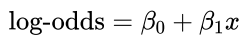
### from probabilities, we know that we can calculate odds with this formula : </br> 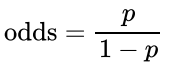

### As an example, let’s use our logistic regression from earlier where Β0 = -3.02126737 and Β1 = 0.6754105 , What is the probability of showing symptoms after six hours, where x = 6? </br> 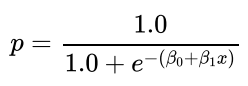

In [6]:
p = logistic_function(6, b0, b1) ; odds = p/(1-p)
print("p is : ",p); print("odds is : ",odds)

p is :  0.7371476279788086
odds is :  2.8044168759465453


### So at six hours, a patient is 2.8044168 times more likely to show symptoms than not show symptoms.
### When we wrap the odds function in a natural logarithm (a logarithm with base e), we call this the <font color=green>logit function</font>. The output of this formula is what we call the <font color=green>log-odds</font> .</br>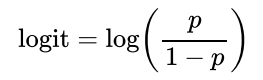

In [7]:
logit = math.log(odds); log_odds = b0 + (b1 * 6)
print(logit); print(log_odds)

1.0311956300000011
1.0311956300000005


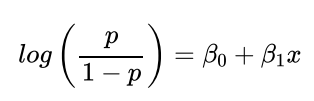

### lets plot our logistic function and log-odds linear function : </br> 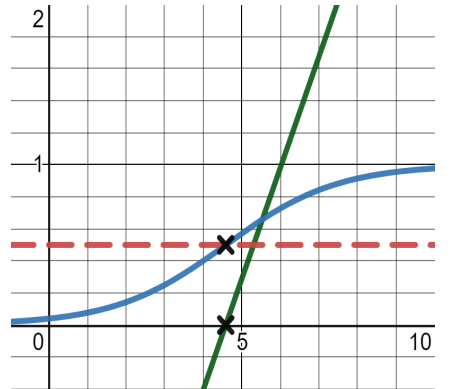 </br> when the log-odds is 0.0 on the line, then the probability of the logistic curve is at 0.5 .
### Let’s say I want to understand how much my odds change between six hours and eight hours of exposure to the chemical. I can take the odds at six hours and then eight hours, and then ratio the two odds against each other in an odds ratio. 

In [8]:
p6 = logistic_function(6, b0, b1); odds6 = p6/(1-p6)
p8 = logistic_function(8, b0, b1); odds8 = p8/(1-p8)
print(odds8/odds6)

3.8605937774449983


### 3.86, meaning that our odds of showing symptoms increases by 3.86 times in 8 hours of exposure against 6 hours of exposure!

## <font color=red>R-Squared</font>
### Just like linear regression, there is an R^2 for a given logistic regression. It indicates how well a given independent variable explains a dependent variable. 
### There is not really a consensus on the best way to calculate the R^2 on a logistic regression, but a popular technique known as <font color=green>McFadden’s Pseudo R2</font> closely mimics the R2 used in linear regression.</br>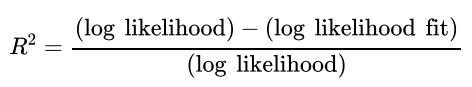</br>
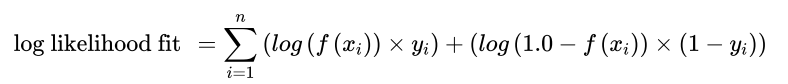


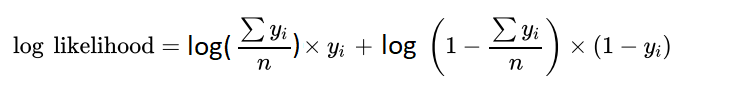

### As we said earlier, because y is ether 0 or 1, then one side of this equation is always 0, if y= 0 then first side is 0, then if y=1 the second side is 0 (1-1 =0).
### so we got an R^2 = 0.306456, a poor fit will be closer to an R^2 of 0.0 and a greater fit will be closer to 1.0 . so There must be variables other than time exposure that better predict if someone will show symptoms or not because our R^2 is closer to 0.
### for example this one below has R^2 = 1 : </br>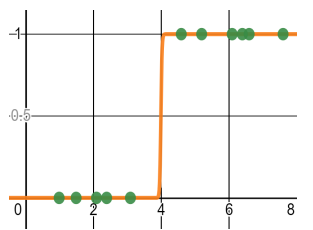

## <font color=red>P-Values</font> 
### We need to investigate how likely we would have seen this data by chance rather than because of an actual relationship. This means we need a <font color=green>p-value</font> .To do this, we use the <font color=green>chi-square distribution</font>, annotated as <font color=green>χ^2</font> distribution. It is continuous.  
### If we take each value in a standard normal distribution (mean of 0 and standard deviation of 1) and square it, that will give us the χ^2 distribution with one <font color=green>degree of freedom (DOF)</font>. For our purposes, the degrees of freedom will depend on how many parameters n are in our logistic regression, which will be <font color=green> n − 1</font>. Since we have two parameters (hours of exposure and whether symptoms were shown), our degree of freedom will be 1 because 2 − 1 = 1.
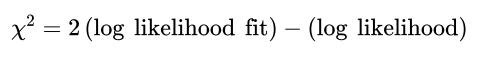
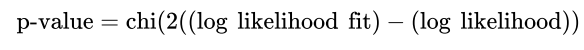

In [9]:
import pandas as pd
from math import log, exp
from scipy.stats import chi2

b0 = -3.02126737; b1 = 0.6754105

#log likelihood fit
log_likelihood_fit = 0
for i in range(len(X)): 
    log_likelihood_fit += log(logistic_function(X[i][0],b0,b1)) * Y[i][0] + \
    log(1.0 - logistic_function(X[i][0],b0,b1)) * (1.0 - Y[i][0])
print("log likelihood fit is : ",log_likelihood_fit)    

#log likelihood
likelihood = (sum(Y)/len(Y))[0]
log_likelihood = 0
for i in range(len(Y)):
    log_likelihood += log(likelihood) * Y[i][0] + log(1 - likelihood) * (1-Y[i][0])
print("log likelihood is : ", log_likelihood )        
 
p_value = chi2.pdf(2 * (log_likelihood_fit - log_likelihood), 1) # 1 degree of freedom (n - 1)
print("p_value is : ",p_value)

log likelihood fit is :  -10.03321716891024
log likelihood is :  -14.341070198709906
p_value is :  0.0018297334566924823


### So we have a p-value of 0.0018297, and if our threshold for signifiance is .05, we say this data is statistically significant and was not by random chance.

## <font color=red> Train/Test Splits</font>
### While it is a good idea to rely on traditional statistical metrics like R^2 and p-values, when you are dealing with more variables, this becomes less practical. This is where train/test splits come. 

In [10]:
#import pandas as pd
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import KFold, cross_val_score

#X = ... ; Y = ...
#kfold = KFold(n_splits=3, random_state=7, shuffle=True)
#model = LogisticRegression(penalty='none')
#results = cross_val_score(model, X, Y, cv=kfold)
#print("Accuracy Mean: ", results.mean(),"Std : ", results.std()))

## <font color=red>Confusion Matrices</font>


### A confusion matrix is a grid that breaks out the predictions against the actual outcomes showing the true positives, true negatives, false positives (type I error), and false negatives (type II error).</br>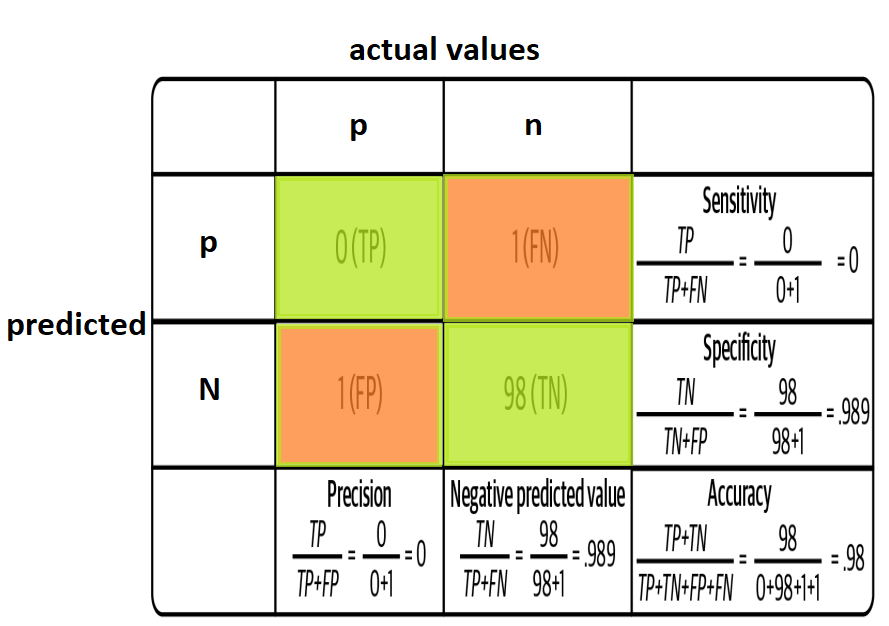

### From the confusion matrix, we can derive all sorts of useful metrics beyond just <font color=green>accuracy</font>( In classification problems, ‘accuracy’ refers to the number of correct predictions made by the predictive model over the rest of the predictions.). We can easily see :</br> <font color=green>precision</font> (means what proportion of all predictions that we made with our predictive model is actually true)</br>  <font color=green>Recall or Sensitivity</font> (the measure that tells what proportion of patients that actually had cancer were also predicted of having cancer.) are 0, meaning this machine learning model fails entirely at positive predictions.</br><font color=green>Specificity</font>(How specific or selective is the classifier in predicting positive instances?) </br> <font color=green>F1 Score</font>(the harmonic mean of precision and recall).</br> Note that the confusion matrix is only applied to the testing dataset.
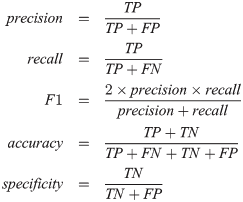

In [11]:
#from sklearn.metrics import confusion_matrix
#matrix = confusion_matrix(Y_real, Y_prediction)

## <font color=red>Receiver Operator Characteristics(ROC)/Area Under Curve(AUC)</font>
### When we are evaluating different machine learning models, we may end up lots of confusion matrices. These can be tedious to review. so we can summarize all of them with a <font color=green>receiver operator characteristic (ROC)</font> . We can also compare different machine learning models by creating separate ROC curves for each.
### For example top curve represents a logistic regression and the bottom curve represents a decision tree. The <font color=green>area under the curve (AUC)</font> is a good metric for choosing which model to use. Since the top curve (logistic regression) has a greater area, this suggests it is a superior model.</br>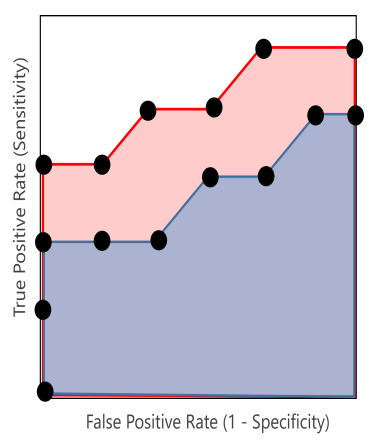

In [12]:
# results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
# print("AUC: ", results.mean() )

## Logistic regressions can predict more than one category rather than just a true/false.